# Pronóstico y predicciones para cadena de gimnasios

## Introducción 
La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. 

Podría calcularse la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. T

En este proyecto se analizarán dichos perfiles para poder elaborar una mejor estrategia de retención de clientes.

Para lograr dicho obejtivo se plantean las sigeuintes tareas: 

- Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
- Analizar los factores que más impactan la pérdida.
- Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente

El dataset con el que se trabajará en este poyecto contiene los sigueintes datos: 

- 'Churn' — la cancelación para el mes en cuestión
- 'gender'.
- 'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
- 'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).
- Promo_friends — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
- 'Phone' — si el/la usuario/a aportó el número de teléfono.
- 'Age'.
- 'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.
- 'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.
- 'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.
- 'Group_visits' — si el/la usuario/a participa en sesiones grupales.
- 'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente.
- 'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso.
- 'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

In [7]:
#Importar librerias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [8]:
#Leer dataset 
df= pd.read_csv('/datasets/gym_churn_us.csv')

## Exploración inicial 

In [10]:
#Revisar dataset 
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [11]:
#Revisar información general mediante método info 
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [12]:
#Cambiamos nombres de columnas a minusculas 
df.columns = df.columns.str.lower()

In [13]:
df.sample(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
2026,1,1,0,0,1,12,0,32,221.308824,9.0,7,2.322493,2.175394,0
3926,0,1,0,0,1,1,0,33,97.364121,1.0,2,1.707046,1.630700,0
3094,1,1,0,0,1,1,0,21,258.057578,1.0,0,1.367080,1.200516,1
3346,1,1,0,1,1,1,0,24,35.664125,1.0,0,1.551622,1.011329,1
1609,1,1,1,1,1,1,0,30,117.061870,1.0,3,0.162850,0.224930,0


### Hallazgos sobre exploración inical de datos
Observamos que para el caso del uso de memoria hay un tamaño aducuado del dataset por lo que no se requiere un cambio en el tipo de datos de las variables, no se observan en primera instancia valores nulos, si bien podría parecer que se debe cambiar ciertos datos que son de tipo entero ('int64'); para efectos de este proyecto se sugiere dejarlos ya que es más adecuado para trabjar con modelos de predicción 

## Análsis exploratorio 

In [14]:
#Revisamos valores duplicados
df.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [15]:
#Buscamos duplicados
df.duplicated().sum()

0

In [16]:
df.duplicated().value_counts()

False    4000
dtype: int64

In [17]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Observamos que para el caso de las variables de edad el rango de edad de personas que acuden al gimnasio son personas de entre 18 y 41 años, siendo el promedio 29 años, el uso de otros servicios en proemdio general es de 146, observamos también que la mayoría de usuarios tienen contrato por un mes siendo usuarios hasta percentil de 75% con 6 meses y menos cantidad de personas tienen contratos de 12 meses. 
La mayoría de usuarios lleva entre 1 y 3 meses con el servicio, igualmente observamos que muchas personas en promedio asisten solo a una clase, a la semana, siendo pocas las que asisten 6 veces por semana.

In [18]:
# Observa los valores medios de las características en dos grupos
df1 = df.groupby(by=['churn'])


In [19]:
print(df1. describe())

       gender                                              near_location  \
        count      mean       std  min  25%  50%  75%  max         count   
churn                                                                      
0      2939.0  0.510037  0.499984  0.0  0.0  1.0  1.0  1.0        2939.0   
1      1061.0  0.510839  0.500118  0.0  0.0  1.0  1.0  1.0        1061.0   

                 ... avg_class_frequency_total            \
           mean  ...                       75%       max   
churn            ...                                       
0      0.873086  ...                  2.732944  6.023668   
1      0.768143  ...                  1.956438  3.478646   

      avg_class_frequency_current_month                                     \
                                  count      mean       std  min       25%   
churn                                                                        
0                                2939.0  2.027882  1.018994  0.0  1.297021   
1     

Observamos que la cantidad de usuarios cuya 

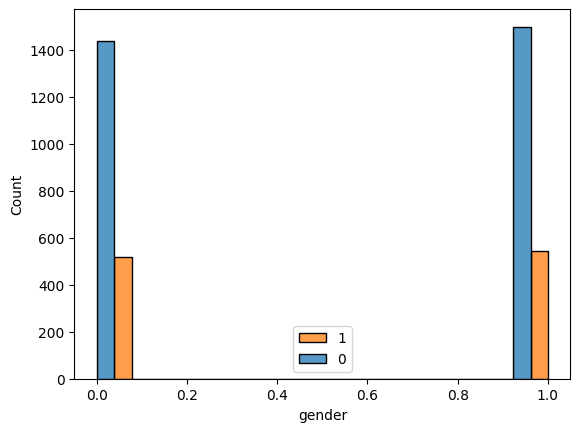

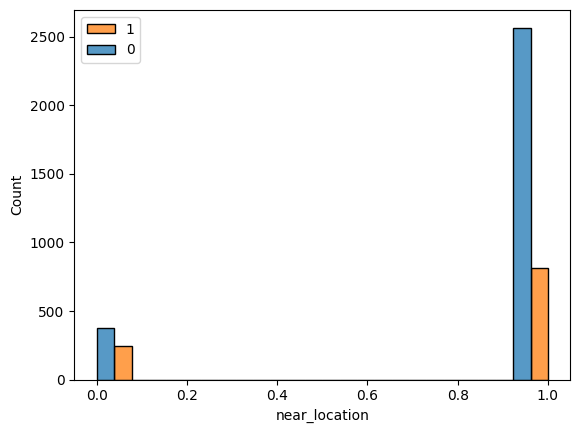

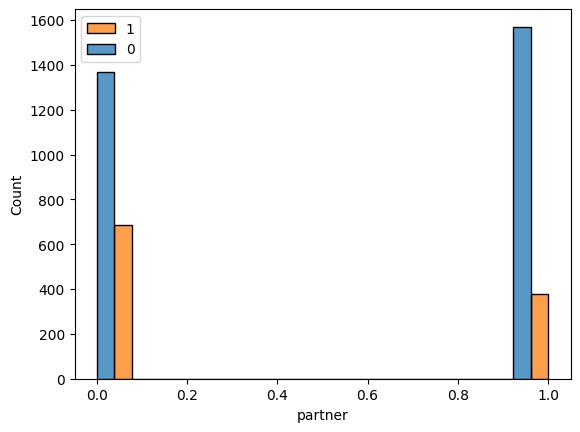

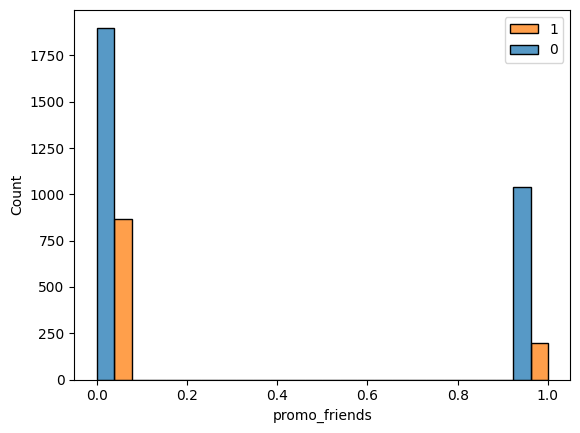

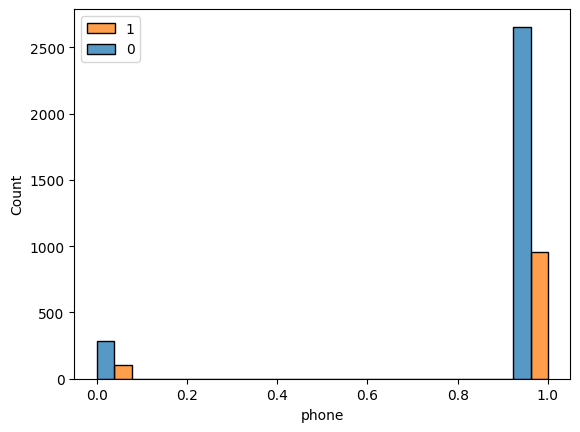

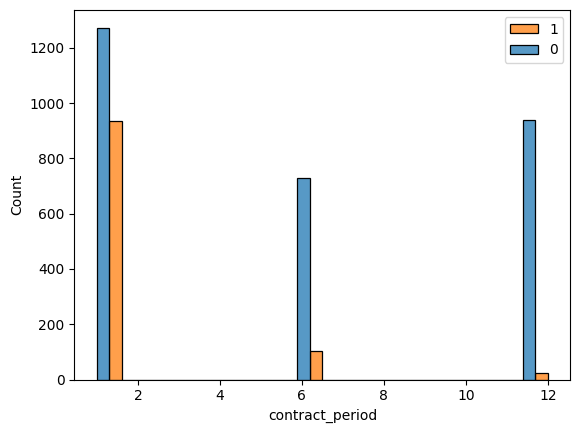

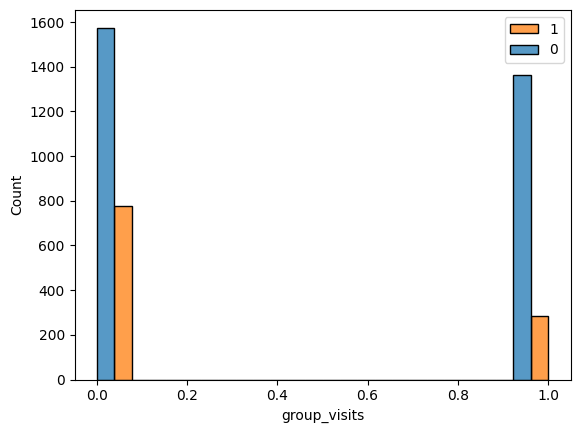

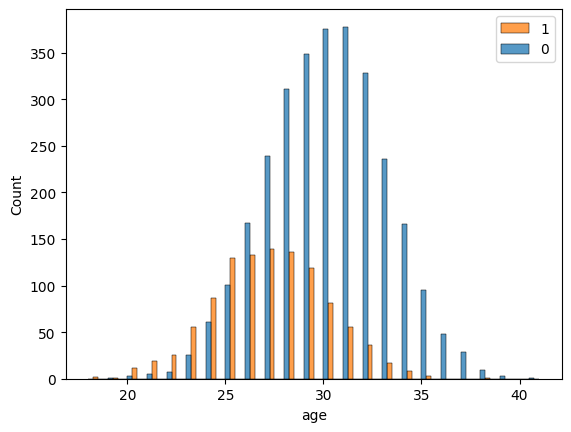

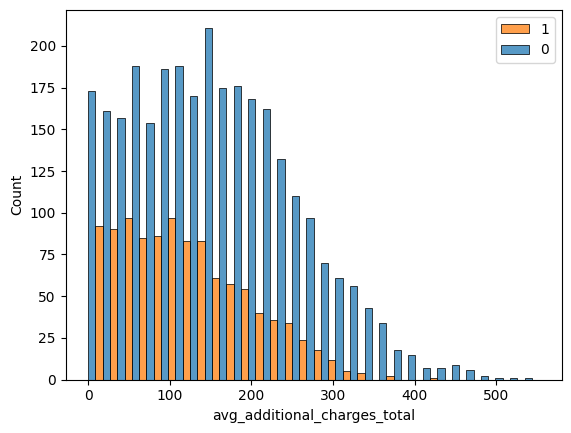

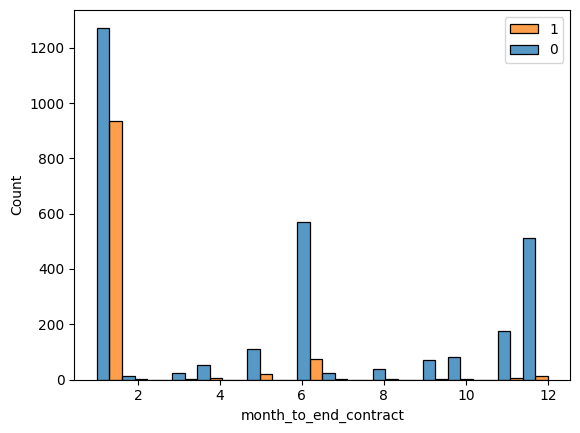

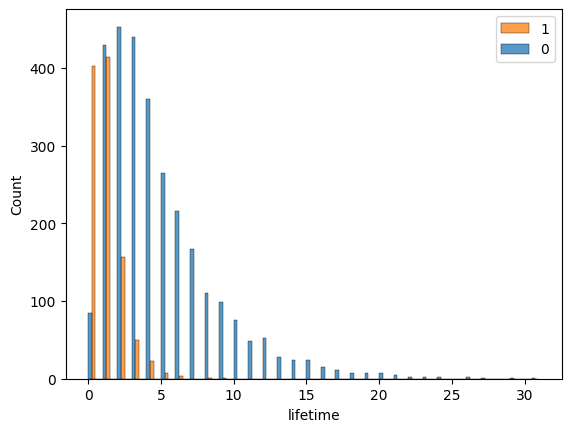

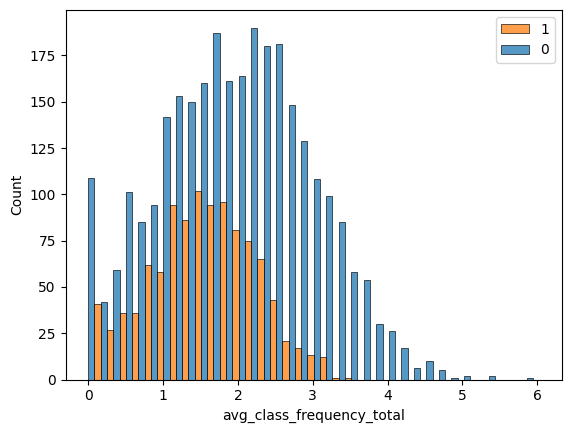

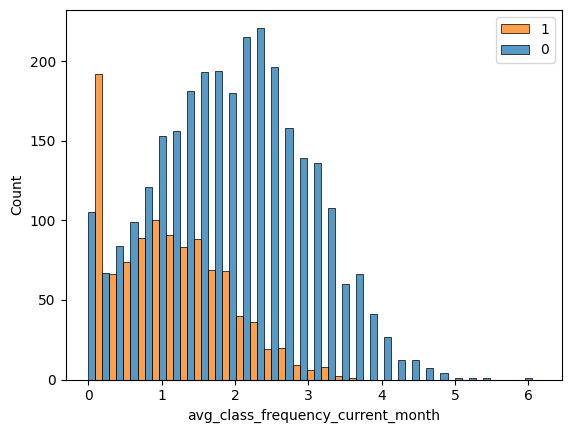

In [20]:
for i in df.drop('churn', axis=1).columns:
    sns.histplot(df, x=i, hue='churn',multiple='dodge')
    plt.legend(labels = ['1', '0'])
    plt.show()

In [21]:
#Crear matriz de correlación 
cm = df.corr() # calcula la matriz de correlación

<Figure size 1500x1000 with 0 Axes>

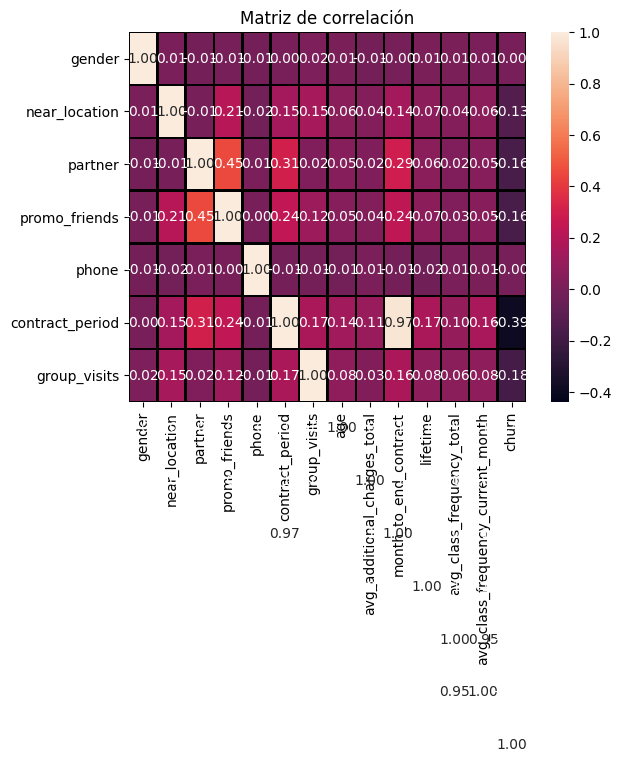

In [22]:

# traza el mapa de calor anotado para la matriz de correlación
plt.figure(figsize=(15, 10))
fig, ax = plt.subplots()
plt.title('Matriz de correlación')
sns.heatmap(
    cm,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
ax.set_ylim(7, 0) # corrige los campos "irregulares" del mapa de calor en la última versión de la librería
plt.show()

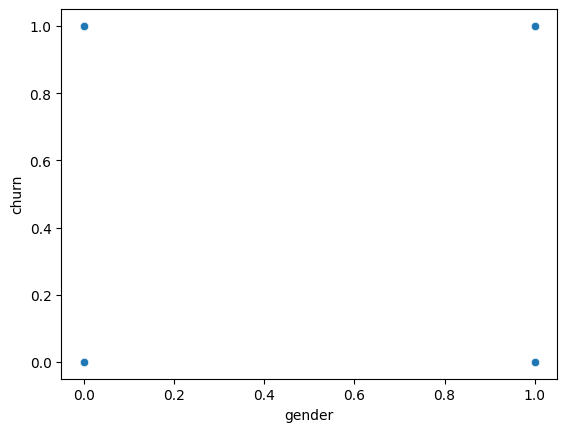

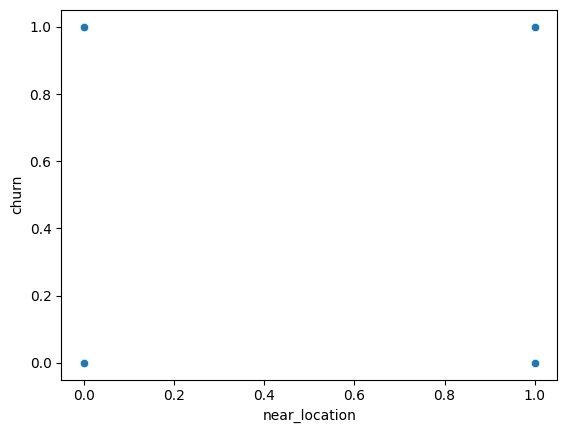

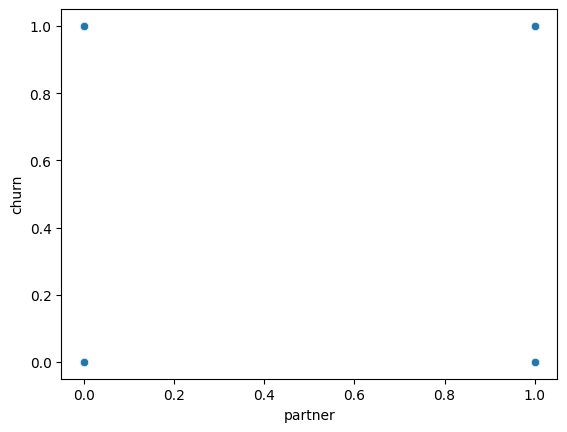

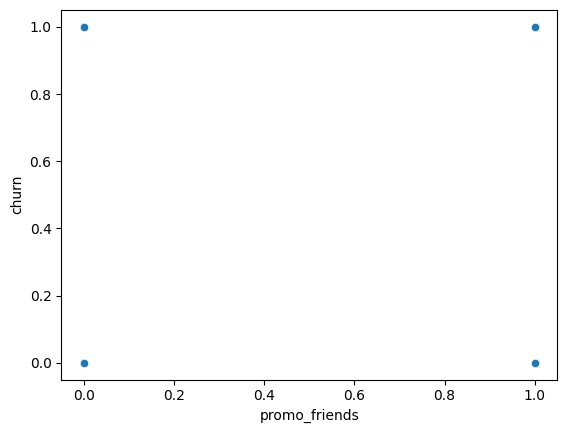

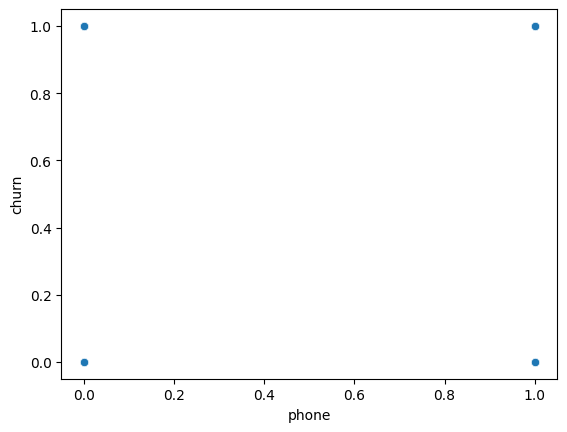

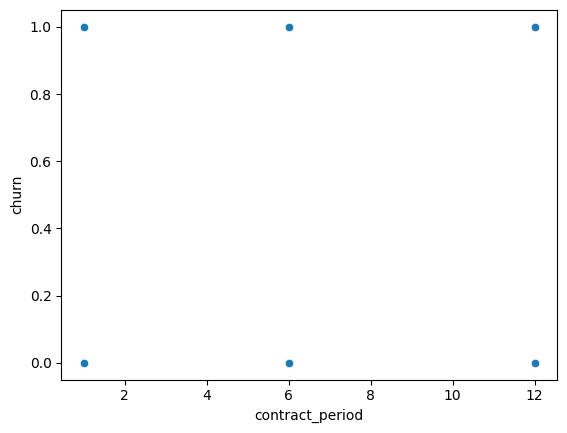

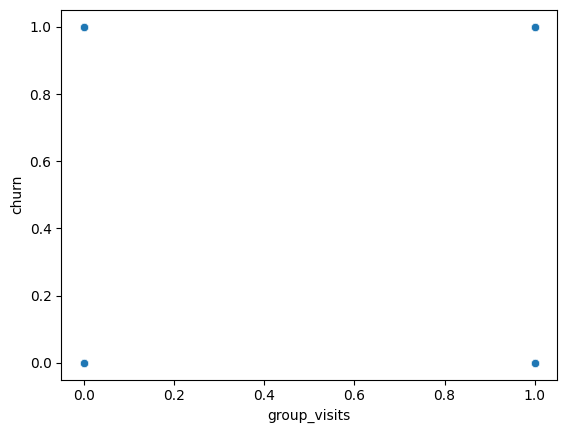

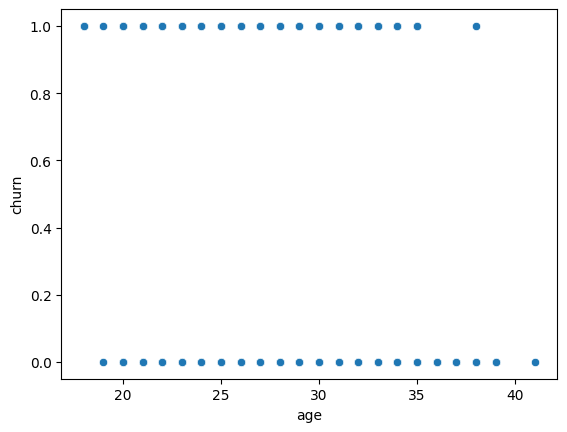

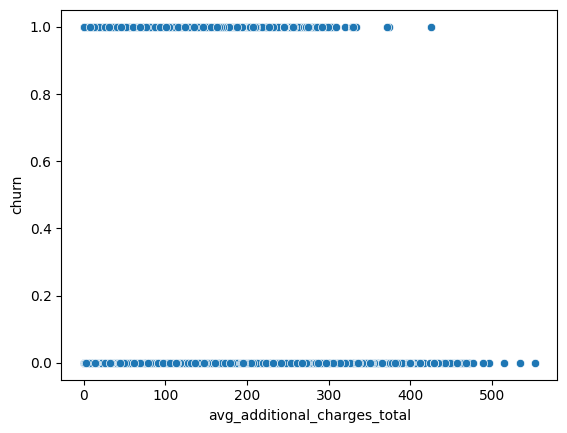

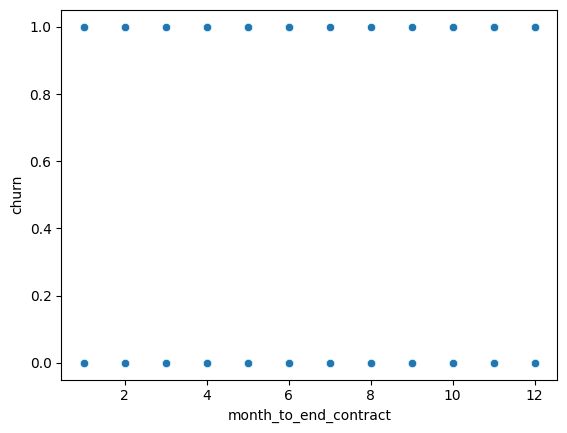

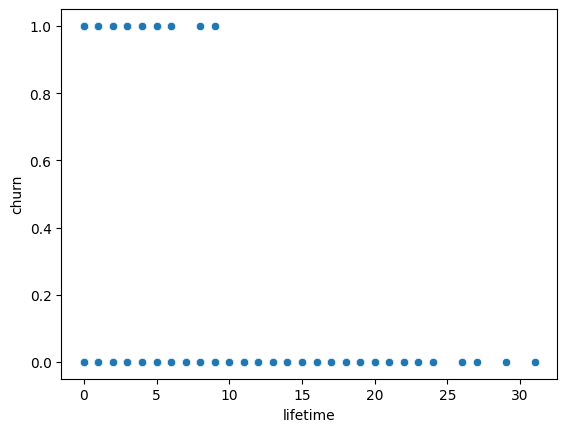

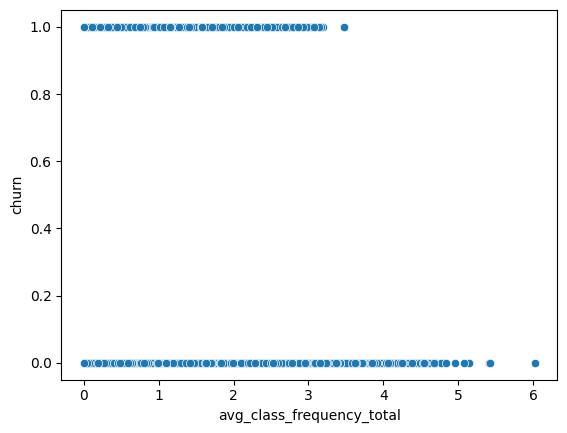

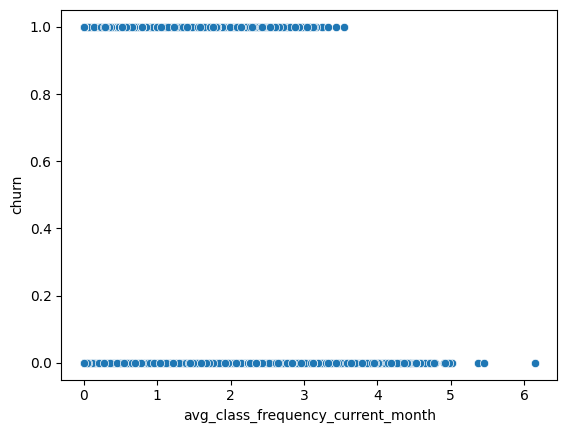

In [23]:
# trazar diagramas de distribución pareada de característica-variable objetivo para cada característica
for col in df.drop('churn', axis=1).columns:
    sns.scatterplot(x=df[col], y=df['churn'])
    plt.show()

### Hallazgos sobre análisis exploratorio 
Al ser todos los valores de tipo numérico y no haber variables categóricas de tipo object que puedan incurrir en duplicados generados por errores ortográficos, podemos concluir que dentro del dataset no hay valores duplicados ni ausentes. 
Para el caso de análsis de correlación de varibles respecto a nuestra variable objetivo que es churn, vemos que hay ciertas variables que tienen la misma cantidad de usuarios con churn 1 (positivo) y 0 (negativo), estas son: 
- gender 
- near_location 
- partner 
- promo_friends 
- phone 
- contract_period 
- group_visits 
- age 
- month_to_end_contract 
Por ende podríamos decir que estas varibles no son tan determinantes para saber si un usuario dejará o no de utilizar el servicio.

Y las variables que si tienen diferencias entre los datos de churn y la variables son: 
- avg_additional_charges_total
- lifetime 
- avg_class_frequency_total
- avg_class_ferquency_current_month 

Dado esto podríamos considerar estos parámetros como los adecudos para obtener un modelo de predicción 


## Modelos de predicción 

In [24]:
#Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().
# divide los datos en características (la matriz X) y una variable objetivo (y)
X = df.drop(columns = ['churn'])
y = df['churn']

# divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# crea un objeto StandardScaler y aplícalo al conjunto de entrenamiento
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) # entrena el scaler y transforma la matriz para el conjunto de entrenamiento
print(X_train_st[:5])

# aplica la estandarización a la matriz de característica para el test de prueba
X_test_st = scaler.transform(X_test)

[[-1.02467945  0.43033148 -0.96438384 -0.65319271  0.3304322  -0.8127049
  -0.83523214  1.18733858  1.33730065 -0.79540001  0.58438018  0.39813377
   0.60360242]
 [-1.02467945  0.43033148 -0.96438384 -0.65319271  0.3304322  -0.8127049
  -0.83523214 -0.35917862 -0.53467939 -0.79540001 -0.99214076  0.11089945
  -0.30638207]
 [-1.02467945  0.43033148 -0.96438384 -0.65319271  0.3304322  -0.8127049
  -0.83523214 -0.04987518  1.71264271 -0.79540001 -0.20388029  0.38607855
   0.45829535]
 [ 0.97591496  0.43033148  1.03693152  1.53094175  0.3304322   0.28184715
  -0.83523214 -0.35917862  1.98416693  0.39576436 -0.46663378 -0.65420543
  -0.69250512]
 [-1.02467945 -2.32379001 -0.96438384 -0.65319271  0.3304322  -0.8127049
   1.19727193  0.25942826  0.19635077 -0.79540001  0.84713367  0.46710993
   0.68057669]]


In [25]:
# Entrena el modelo en el set de entrenamiento con dos métodos:
#regresión logística;
#bosque aleatorio.

models = [LogisticRegression(), RandomForestClassifier()]

#Evalúa la exactitud, precisión y recall para ambos modelos 
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    probabilities = model.predict_proba(X_test_st)[:,1]
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_test, y_pred)))
    print('-----------------------------------------')

  
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression()
	Accuracy: 0.93
	Precision: 0.89
	Recall: 0.83
-----------------------------------------
RandomForestClassifier()
	Accuracy: 0.92
	Precision: 0.87
	Recall: 0.82
-----------------------------------------


Observamos que con las métricas exactitud, precisión y recall, observamo que ambos modelos tienen resultados similares, obteniendo resultados identicos en exctitud y precision, sin embargo en la métrica recall la cual nos indica la cantidad de valores positivos, el model de RandomForestClassifier() obtuvo mejores reultados que la regresión logística con un puntaje de 83% sobre uno de 81% 

## Creación de clusters

In [26]:
#Estandariza los datos.
sc = StandardScaler()
x_sc = sc.fit_transform(df)

In [27]:
#Utiliza la función linkage()
linked = linkage(x_sc, method = 'ward')

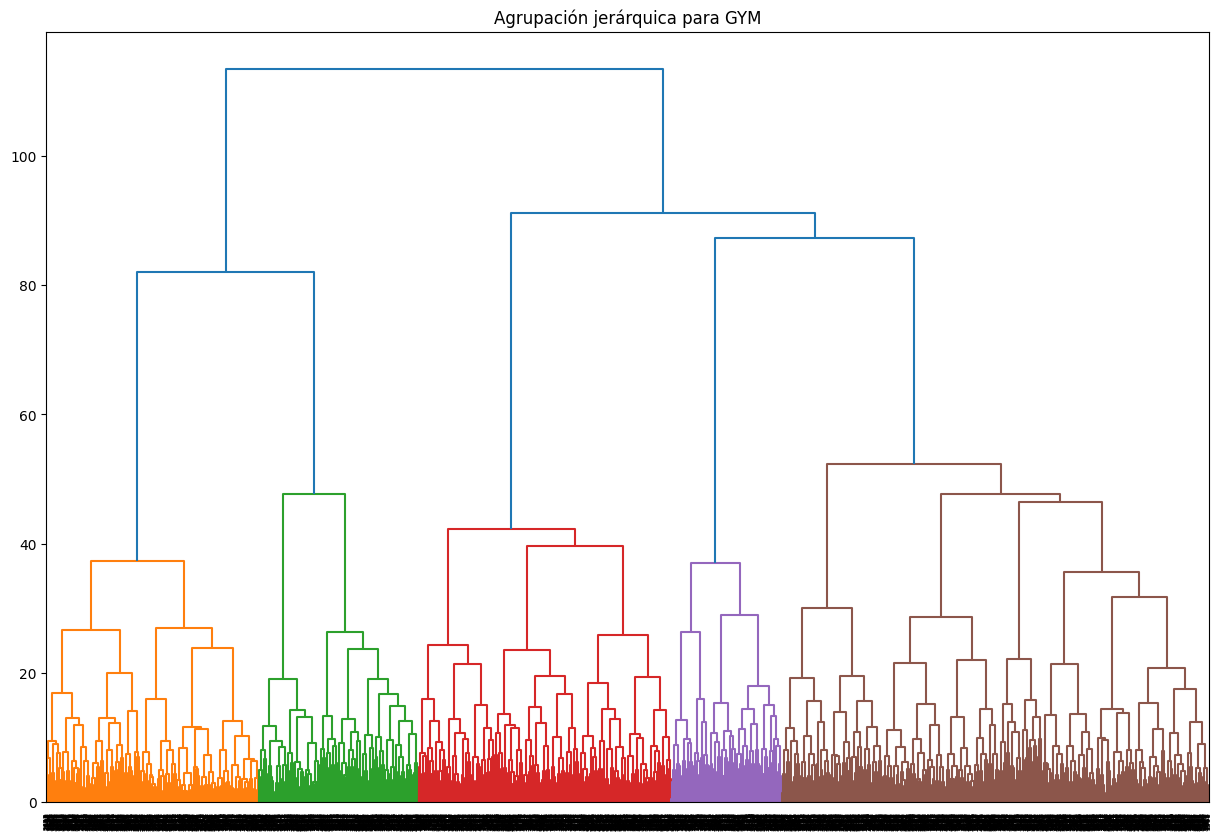

In [28]:
#trazar un dendrograma
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM')
plt.show()

In [29]:
#Entrena el modelo de clustering con el algortimo K-means 
km = KMeans(n_clusters=5)
# predice los clústeres para las observaciones (el algoritmo les asigna un número de 0 a 4)
labels = km.fit_predict(x_sc)
# almacena etiquetas de clúster en el campo de nuestro conjunto de datos
df['cluster_km'] = labels

# obtiene las estadísticas de los valores medios de las características por clúster
df.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.526178,0.869110,0.471204,0.308901,0.000000,4.816754,0.429319,29.340314,144.517762,4.502618,3.955497,1.857525,1.727260,0.261780
1,0.552169,0.842907,0.369285,0.212192,0.998828,2.672919,0.440797,29.971864,160.851788,2.466589,4.610785,2.914886,2.921860,0.007034
2,0.473380,0.826389,0.456019,0.261574,1.000000,2.753472,0.381944,30.043981,151.483414,2.548611,4.637731,1.168594,1.167441,0.001157
3,0.503125,0.938542,0.767708,0.562500,1.000000,11.200000,0.559375,29.880208,162.783361,10.251042,4.718750,2.028887,2.023255,0.015625
4,0.506908,0.759830,0.341126,0.179596,0.996812,1.566419,0.257173,26.907545,114.993470,1.513284,0.975558,1.448150,1.025562,0.997875


A continuación se observan los valores medios de característica para los clústeres.

In [30]:
#Traza distribuciones de características para los clústeres. 
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(x=df[x_name], y=df[y_name],
          hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()



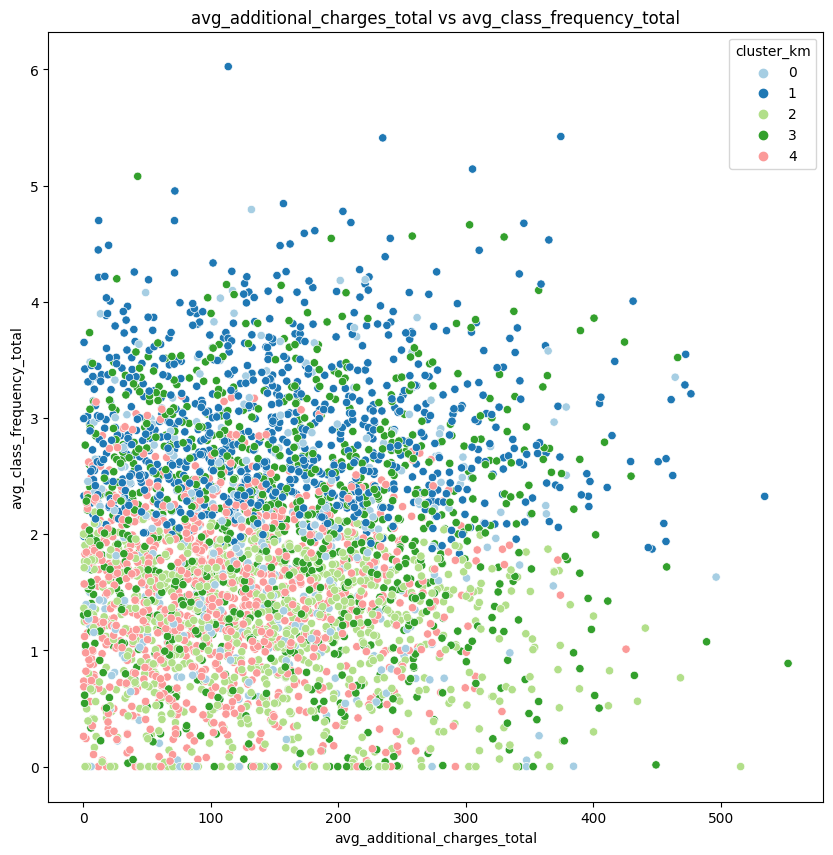

In [31]:
show_clusters_on_plot(df, 'avg_additional_charges_total', 'avg_class_frequency_total', 'cluster_km')

En este caso observamos poca correlación entre la cantidad de clases tomadas y los gastos adicionales, además uqe observamos que los diferentes cluster estan dipersos.

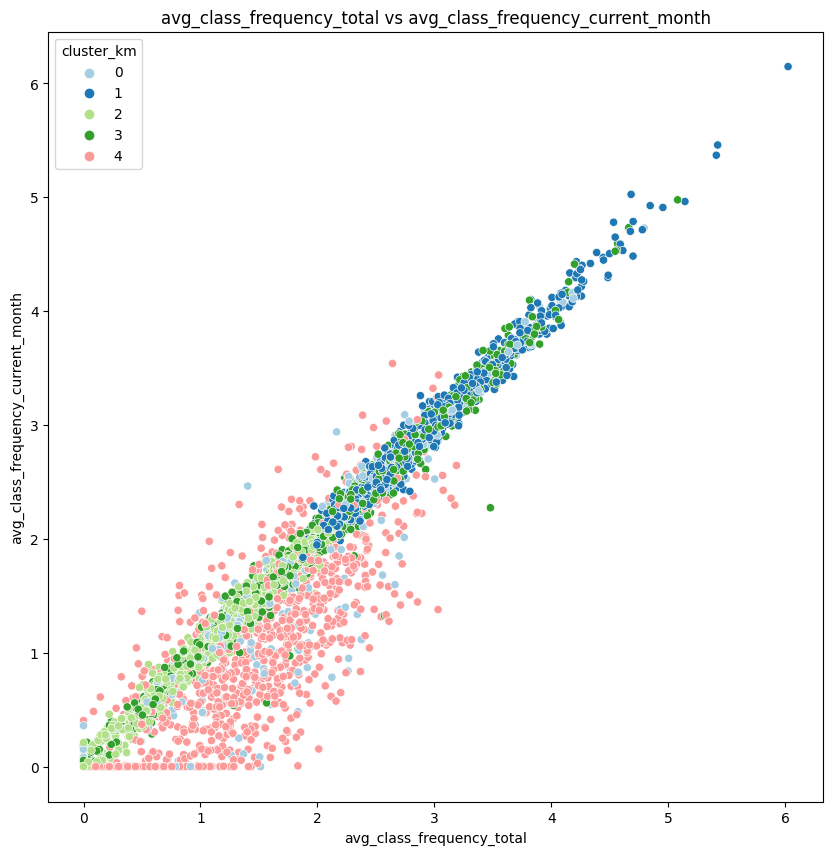

In [32]:
show_clusters_on_plot(df, 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'cluster_km')

En este caso si observamos una correalación positiva entre la frecuencia de clases totales y clases por mes, siendo el cluster 0 el que menso clases por semana tiene acumuladas con un  total de 3,observamos también que los cluster 1 y 3 tienen mayor cantidad de aistencia a clases, por lo que este puede ser un factor importante.

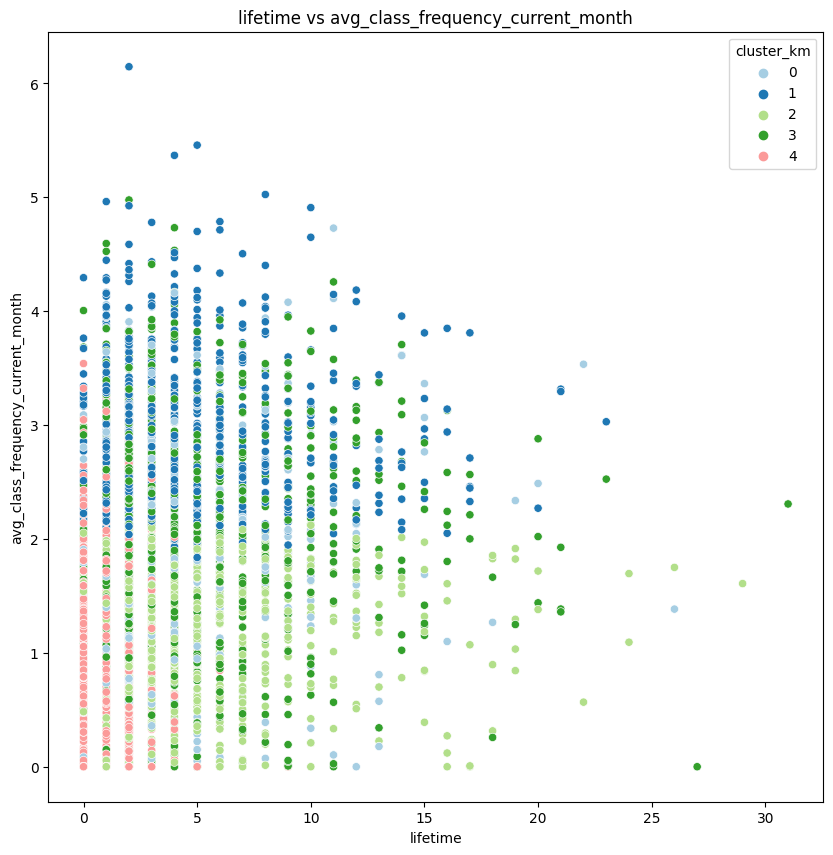

In [33]:
show_clusters_on_plot(df, 'lifetime', 'avg_class_frequency_current_month', 'cluster_km')

Finalmente observamos que el clsuter son los que tienen menos tiempo y poca asistencia a clases, siendo los clusters con mayor asistencia (1 y 3) llevan poco tiempo, ya que para estos casos a medida que aumenta la antiguedad disminuye la cantidad de clases asistidas siendo el punto máximo entre 2 y 3.

In [34]:
#Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()).
churn_rate = df.groupby(['cluster_km'])['churn'].mean().reset_index()
churn_rate

,cluster_km,churn
0,0,0.261780
1,1,0.007034
2,2,0.001157
3,3,0.015625
4,4,0.997875


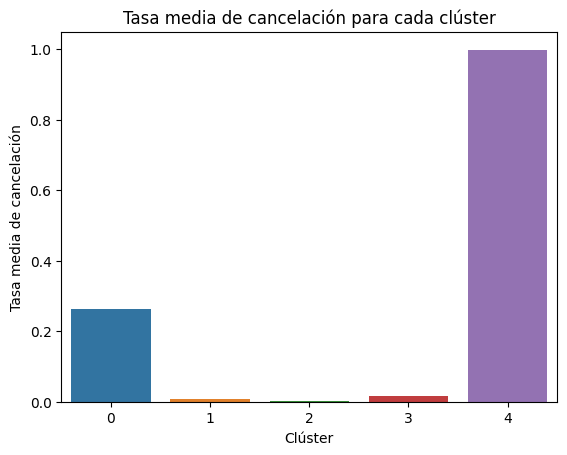

In [40]:
plt.title('Tasa media de cancelación para cada clúster')
ax = sns.barplot(data=churn_rate,x='cluster_km', y='churn')
ax.set(xlabel='Clúster', ylabel='Tasa media de cancelación')
plt.show()

Podemos observar que el cluster con mayor tasa de cancelación es el cuatro. 
Sus carateristicas son: 
- Poca asistencia a clases, poco gasto de servicios adicionales y no tienen atiguedad.

Para los cluster 1 y 2 que son los de menor tasa tenemos lo siguiente: 
- Antiguedad con asistencia regualr a clases (no es alta pero tampoco baja) 
- Poca antiguedad pero alta tasa de asistencia a clases. 

## Conclusiones

Observamos que a pesar de contar con clientes de caracteristicas variadas, tenemos ciertas características que nos permiten generar reportes más precisos. 
Observamos que las características demográficas son poco determinantes para saber si un usuario abandonará el servicio o no, siendo que las varibles determianantes son los hábitos de uso de las instalalaciones. 
Para este caso, vemos que los clientes leales tienden a gastar un poco más en servicios adicioanles, pero esto no mostró ser un factor determiante, ya que la mayoría de usaurios tienen un patrón similar sin una tendencia establecida. 
El factor más determiannte es la asistencia a clases ya que observamos que las personas que asisten con mayor regularidad a clases, tienen menos probailidaddes de abandono, por lo que la estrategia de siguimiento debe enfocarse en la asistencia al gimnasio, para lograr generar un sentido de pertenencia al mismo, siendo los primeros tres meses los más cruciales pues la gran mayoría de usuarios en clusters con alta tasa de abandono, dejan el servicio en un lapso de tres meses, siendo que pasado ese punto los usuarios con maypr antiguedad si bien no tienen tasas de abandono si baja la asistencia a clases.